In [1]:
import os

os.getcwd()

'/home/asutosh/Documents/projects/ml_projects/deep-cross-nn-demo/src'

In [2]:
input_path = '../data/abalone'
output_path = '../output'

In [3]:
import pandas as pd

# Length	Diam	Height	Whole	Shucked	Viscera	Shell	Rings
df = pd.read_csv(os.path.join(input_path, 'abalone.data'),
             names=['sex', 'length', 'diam', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight', 'rings'])
df.head()

,sex,length,diam,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
df['age'] = df['rings'] + 1.5
df.head()

,sex,length,diam,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


In [5]:
df.describe()

,length,diam,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings,age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000,30.500000


<Axes: >

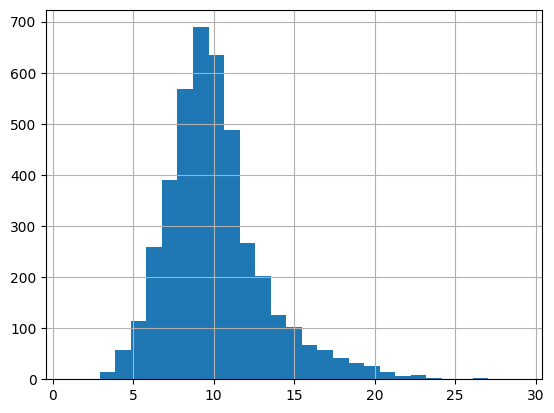

In [6]:
df['rings'].hist(bins=29)

In [7]:
from sklearn.model_selection import train_test_split

df = df.drop('rings', axis=1)
df_x = df.drop('age', axis=1)
df_y = df['age'].values.reshape(-1, 1)

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, test_size=0.2, random_state=42, shuffle=True)

print(f'train size x: {df_train_x.shape}, train size y: {df_train_y.shape}, test size x: {df_test_x.shape}, test size y: {df_test_y.shape}')

train size x: (3341, 8), train size y: (3341, 1), test size x: (836, 8), test size y: (836, 1)


In [8]:
print(df_train_x.head())
print(df_train_y[:5])

     sex  length   diam  height  whole_weight  shucked_weight  viscera_weight  \
4038   I   0.550  0.445   0.125        0.6720          0.2880          0.1365   
1272   I   0.475  0.355   0.100        0.5035          0.2535          0.0910   
3384   F   0.305  0.225   0.070        0.1485          0.0585          0.0335   
3160   I   0.275  0.200   0.065        0.1165          0.0565          0.0130   
3894   M   0.495  0.380   0.135        0.6295          0.2630          0.1425   

      shell_weight  
4038         0.210  
1272         0.140  
3384         0.045  
3160         0.035  
3894         0.215  
[[12.5]
 [ 9.5]
 [ 8.5]
 [ 8.5]
 [13.5]]


In [9]:
from sklearn.preprocessing import StandardScaler

numeric_cols = ['length', 'diam', 'height', 'whole_weight', 
                'shucked_weight', 'viscera_weight', 'shell_weight']

scaler_x = StandardScaler()
scaler_y = StandardScaler()

scaler_x = scaler_x.fit(df_train_x[numeric_cols])
scaler_y = scaler_y.fit(df_train_y)

df_train_x_scaled = scaler_x.transform(df_train_x[numeric_cols])
df_test_x_scaled = scaler_x.transform(df_test_x[numeric_cols])
np_train_y_scaled = scaler_y.transform(df_train_y)
np_test_y_scaled = scaler_y.transform(df_test_y)

df_train_x_scaled = pd.DataFrame(df_train_x_scaled, 
                                 columns=numeric_cols, 
                                 index=df_train_x.index)
df_test_x_scaled = pd.DataFrame(df_test_x_scaled, 
                                 columns=numeric_cols, 
                                 index=df_test_x.index)

df_train_x_scaled['sex'] = df_train_x['sex']
df_test_x_scaled['sex'] = df_test_x['sex']

In [10]:
# scaled df_train_x, df_test_x, np_train_y, np_test_y, scaler_x, scaler_y

import numpy as np
import pickle

df_train_x_scaled.to_pickle(os.path.join(output_path, 'df_train_x_scaled.pkl'))
df_test_x_scaled.to_pickle(os.path.join(output_path, 'df_test_x_scaled.pkl'))

np.save(os.path.join(output_path, 'np_train_y_scaled.npy'), np_train_y_scaled)
np.save(os.path.join(output_path, 'np_test_y_scaled.npy'), np_test_y_scaled)

with open(os.path.join(output_path, 'scaler_x.pkl'), 'wb') as f:
    pickle.dump(scaler_x, f)

with open(os.path.join(output_path, 'scaler_y.pkl'), 'wb') as f:
    pickle.dump(scaler_y, f)

print('6 files saved!')

6 files saved!


In [11]:
from datetime import datetime

p = output_path  # uses existing variable
if not os.path.exists(p):
    print(f'Path not found: {p}')
else:
    files = [f for f in os.listdir(p) if os.path.isfile(os.path.join(p, f))]
    rows = []
    for fname in files:
        full = os.path.join(p, fname)
        st = os.stat(full)
        mtime = datetime.fromtimestamp(st.st_mtime)
        rows.append((fname, mtime, st.st_size))
    rows.sort(key=lambda x: x[1], reverse=True)
    df_files = pd.DataFrame(rows, columns=['file', 'modified_time', 'size_bytes'])
    display(df_files)  # Jupyter-friendly table

,file,modified_time,size_bytes
0,scaler_y.pkl,2025-10-25 21:03:53.860210,474
1,scaler_x.pkl,2025-10-25 21:03:53.860210,794
2,np_train_y_scaled.npy,2025-10-25 21:03:53.860210,26856
3,np_test_y_scaled.npy,2025-10-25 21:03:53.860210,6816
4,df_test_x_scaled.pkl,2025-10-25 21:03:53.859210,56009
5,df_train_x_scaled.pkl,2025-10-25 21:03:53.859210,221354
